#Import required libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load preprocessed PPMI Datasets:

In [ ]:
ppmi_hc=pd.read_csv('/content/drive/MyDrive/Parkinsons_Model/PPMI_HC.csv')
ppmi_pd=pd.read_csv('/content/drive/MyDrive/Parkinsons_Model/PPMI_PD.csv')

#Drop "Patient No." column from the dataset.

In [ ]:
ppmi_hc = ppmi_hc.drop('PATNO', axis=1)
ppmi_pd = ppmi_pd.drop('PATNO', axis=1)
ppmi_pd.head()

,"('NP1COG', 'BL')","('NP1COG', 'V02')","('NP1COG', 'V04')","('NP1COG', 'V06')","('NP1COG', 'V08')","('NP1COG', 'V10')","('NP1COG', 'V12')","('NP1HALL', 'BL')","('NP1HALL', 'V02')","('NP1HALL', 'V04')",...,"('SDMTOTAL', 'V08')","('SDMTOTAL', 'V10')","('SDMTOTAL', 'V12')","('JLO_TOTRAW', 'BL')","('JLO_TOTRAW', 'V04')","('JLO_TOTRAW', 'V06')","('JLO_TOTRAW', 'V08')","('JLO_TOTRAW', 'V10')","('JLO_TOTRAW', 'V12')",ENROLL_CAT
0,0.00,0.00,0.25,0.0,0.00,0.00,0.25,0.0,0.0,0.00,...,0.470588,0.470588,0.441176,1.000000,0.800000,1.000000,0.866667,0.933333,1.000000,PD
1,0.25,0.25,0.25,0.5,0.25,0.25,0.50,0.0,0.0,0.00,...,0.431373,0.421569,0.372549,0.866667,0.800000,0.866667,0.733333,1.000000,0.866667,PD
2,0.00,0.00,0.00,0.0,0.00,0.00,0.25,0.0,0.0,0.00,...,0.480392,0.411765,0.421569,0.866667,0.866667,0.933333,0.866667,1.000000,0.800000,PD
3,0.25,0.25,0.00,0.0,0.25,0.00,0.25,0.0,0.0,0.25,...,0.490196,0.607843,0.539216,0.666667,0.866667,0.866667,0.866667,0.800000,0.933333,PD
4,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.431373,0.401961,0.372549,0.866667,0.666667,0.833333,1.000000,0.833333,0.666667,PD


#Replace categorical value with binary number.

In [ ]:
ppmi_hc['ENROLL_CAT'] = ppmi_hc['ENROLL_CAT'].replace('HC',0)
ppmi_pd['ENROLL_CAT'] = ppmi_pd['ENROLL_CAT'].replace('PD',1)

In [ ]:
ppmi_pd

,"('NP1COG', 'BL')","('NP1COG', 'V02')","('NP1COG', 'V04')","('NP1COG', 'V06')","('NP1COG', 'V08')","('NP1COG', 'V10')","('NP1COG', 'V12')","('NP1HALL', 'BL')","('NP1HALL', 'V02')","('NP1HALL', 'V04')",...,"('SDMTOTAL', 'V08')","('SDMTOTAL', 'V10')","('SDMTOTAL', 'V12')","('JLO_TOTRAW', 'BL')","('JLO_TOTRAW', 'V04')","('JLO_TOTRAW', 'V06')","('JLO_TOTRAW', 'V08')","('JLO_TOTRAW', 'V10')","('JLO_TOTRAW', 'V12')",ENROLL_CAT
0,0.00,0.000,0.25,0.0,0.00,0.00,0.25,0.0,0.0,0.00,...,0.470588,0.470588,0.441176,1.000000,0.800000,1.000000,0.866667,0.933333,1.000000,1
1,0.25,0.250,0.25,0.5,0.25,0.25,0.50,0.0,0.0,0.00,...,0.431373,0.421569,0.372549,0.866667,0.800000,0.866667,0.733333,1.000000,0.866667,1
2,0.00,0.000,0.00,0.0,0.00,0.00,0.25,0.0,0.0,0.00,...,0.480392,0.411765,0.421569,0.866667,0.866667,0.933333,0.866667,1.000000,0.800000,1
3,0.25,0.250,0.00,0.0,0.25,0.00,0.25,0.0,0.0,0.25,...,0.490196,0.607843,0.539216,0.666667,0.866667,0.866667,0.866667,0.800000,0.933333,1
4,0.00,0.000,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.431373,0.401961,0.372549,0.866667,0.666667,0.833333,1.000000,0.833333,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.00,0.000,0.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,...,0.313725,0.470588,0.500000,0.933333,0.866667,0.733333,0.733333,0.733333,0.866667,1
290,0.00,0.000,0.00,0.0,0.00,0.25,0.25,0.0,0.0,0.00,...,0.480392,0.480392,0.411765,0.933333,0.666667,0.866667,0.866667,0.600000,0.733333,1
291,0.00,0.000,0.00,0.0,0.00,0.00,0.25,0.0,0.0,0.00,...,0.460784,0.382353,0.500000,1.000000,0.866667,1.000000,1.000000,1.000000,1.000000,1
292,0.00,0.000,0.00,0.0,0.00,0.00,0.25,0.0,0.0,0.00,...,0.519608,0.480392,0.578431,0.733333,0.533333,0.800000,0.466667,0.733333,0.800000,1


#Separate PPMI labels form features.

In [ ]:
ppmi_pd_x=ppmi_pd.drop(['ENROLL_CAT'],axis=1)
ppmi_hc_x=ppmi_hc.drop(['ENROLL_CAT'],axis=1)
ppmi_pd_y=ppmi_pd.ENROLL_CAT
ppmi_hc_y=ppmi_hc.ENROLL_CAT

In [ ]:
ppmi_hc_x

,"('NP1COG', 'BL')","('NP1COG', 'V02')","('NP1COG', 'V04')","('NP1COG', 'V06')","('NP1COG', 'V08')","('NP1COG', 'V10')","('NP1COG', 'V12')","('NP1HALL', 'BL')","('NP1HALL', 'V02')","('NP1HALL', 'V04')",...,"('SDMTOTAL', 'V06')","('SDMTOTAL', 'V08')","('SDMTOTAL', 'V10')","('SDMTOTAL', 'V12')","('JLO_TOTRAW', 'BL')","('JLO_TOTRAW', 'V04')","('JLO_TOTRAW', 'V06')","('JLO_TOTRAW', 'V08')","('JLO_TOTRAW', 'V10')","('JLO_TOTRAW', 'V12')"
0,0.25,0.125,0.0,0.25,0.25,0.00,0.25,0.0,0.0,0.0,...,0.500000,0.519608,0.500000,0.519608,1.000000,1.000000,0.933333,0.866667,0.933333,1.000000
1,0.00,0.000,0.0,0.00,0.25,0.00,0.00,0.0,0.0,0.0,...,0.490196,0.450980,0.519608,0.500000,0.866667,0.866667,1.000000,0.933333,1.000000,1.000000
2,0.00,0.000,0.0,0.00,0.00,0.25,0.00,0.0,0.0,0.0,...,0.343137,0.323529,0.362745,0.343137,0.800000,0.800000,0.800000,0.600000,0.933333,0.666667
3,0.00,0.000,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.421569,0.428105,0.434641,0.441176,0.733333,0.333333,0.866667,0.888889,0.911111,0.933333
4,0.00,0.000,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.343137,0.382353,0.362745,0.323529,1.000000,0.933333,0.933333,0.733333,0.800000,0.733333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.00,0.000,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.450980,0.490196,0.509804,0.421569,1.000000,1.000000,1.000000,1.000000,0.933333,0.933333
150,0.00,0.000,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.460784,0.696078,0.480392,0.441176,0.933333,0.933333,0.933333,0.933333,0.933333,0.933333
151,0.00,0.000,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.323529,0.421569,0.372549,0.382353,0.800000,0.866667,0.933333,0.666667,0.733333,0.866667
152,0.00,0.000,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,...,0.490196,0.392157,0.401961,0.421569,0.866667,1.000000,0.733333,0.933333,0.733333,0.933333


#Split dataset for training, validation and testing purpose.

In [ ]:
from sklearn.model_selection import train_test_split
ppmi_pd_x_train, ppmi_pd_x_test, ppmi_pd_y_train, ppmi_pd_y_test = train_test_split(ppmi_pd_x, ppmi_pd_y, test_size = 0.50, random_state = 0)
ppmi_hc_x_train, ppmi_hc_x_test, ppmi_hc_y_train, ppmi_hc_y_test = train_test_split(ppmi_hc_x, ppmi_hc_y, test_size = 0.50, random_state = 0)
ppmi_pd_x_val, ppmi_pd_x_test, ppmi_pd_y_val, ppmi_pd_y_test = train_test_split(ppmi_pd_x_test, ppmi_pd_y_test, test_size = 0.50, random_state = 0)
ppmi_hc_x_val, ppmi_hc_x_test, ppmi_hc_y_val, ppmi_hc_y_test = train_test_split(ppmi_hc_x_test, ppmi_hc_y_test, test_size = 0.50, random_state = 0)

#Concatenate data of both the classes.

In [ ]:
X_train = [ppmi_pd_x_train, ppmi_hc_x_train]
X_train=pd.concat(X_train)
X_test = [ppmi_pd_x_test, ppmi_hc_x_test]
X_test=pd.concat(X_test)
X_val = [ppmi_pd_x_val, ppmi_hc_x_val]
X_val=pd.concat(X_val)

#Standardize those features :

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_val = sc.fit_transform(X_val)

In [ ]:
y_train=ppmi_pd_y_train.append(ppmi_hc_y_train)
y_test=ppmi_pd_y_test.append(ppmi_hc_y_test)
y_val=ppmi_pd_y_val.append(ppmi_hc_y_val)

<ipython-input-131-50642b35d8bf>:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_train=ppmi_pd_y_train.append(ppmi_hc_y_train)
<ipython-input-131-50642b35d8bf>:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_test=ppmi_pd_y_test.append(ppmi_hc_y_test)
<ipython-input-131-50642b35d8bf>:3: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  y_val=ppmi_pd_y_val.append(ppmi_hc_y_val)


#Import another set of required libraries.

In [ ]:
from keras.models import Model
from keras.layers import Layer, Dropout, Conv2D, Dense, MaxPooling2D, Input, Flatten, Lambda
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.metrics import SparseCategoricalAccuracy
# from focal_loss import SparseCategoricalFocalLoss

#Neural Network Architecture for basline model :

In [ ]:
model=keras.Sequential()
model.add(Input(shape=1595, name="base_input"))
# model.add(Flatten(name="flatten_input"))
model.add(Dense(128, activation='relu', name="first_base_dense"))
model.add(Dense(50, activation='relu', name="second_base_dense"))
# model.add(Flatten(name="flatten_input"))
model.add(Dropout(0.5, name="first_dropout"))
model.add(Dense(20, activation='relu', name="third_base_dense"))
model.add(Dropout(0.5, name="second_dropout"))
model.add(Dense(4, activation='relu', name="fourth_base_dense"))
model.add(Dense(2, activation='softmax'))
# model=Model(input,x)
model.compile(loss = 'sparse_categorical_crossentropy', 
              optimizer = tf.keras.optimizers.RMSprop(0.0001), 
              metrics =['sparse_categorical_accuracy',
                        # tf.keras.metrics.Precision(name='precision'),
                        # tf.keras.metrics.Recall(name='recall'),
                        # tf.keras.metrics.AUC(name='auc')
                        ])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_base_dense (Dense)    (None, 128)               204288    
                                                                 
 second_base_dense (Dense)   (None, 50)                6450      
                                                                 
 first_dropout (Dropout)     (None, 50)                0         
                                                                 
 third_base_dense (Dense)    (None, 20)                1020      
                                                                 
 second_dropout (Dropout)    (None, 20)                0         
                                                                 
 fourth_base_dense (Dense)   (None, 4)                 84        
                                                                 
 dense_6 (Dense)             (None, 2)                

#Training Process:

In [ ]:
history=model.fit(X_train,y_train,validation_data=(X_val,y_val),batch_size=32,epochs=30)

Epoch 1/30
7/7 [==============================] - 1s 40ms/step - loss: 1.5067 - sparse_categorical_accuracy: 0.3929 - val_loss: 1.1021 - val_sparse_categorical_accuracy: 0.3333
Epoch 2/30
7/7 [==============================] - 0s 14ms/step - loss: 1.3706 - sparse_categorical_accuracy: 0.4375 - val_loss: 0.9627 - val_sparse_categorical_accuracy: 0.3604
Epoch 3/30
7/7 [==============================] - 0s 13ms/step - loss: 1.2468 - sparse_categorical_accuracy: 0.4866 - val_loss: 0.8804 - val_sparse_categorical_accuracy: 0.3784
Epoch 4/30
7/7 [==============================] - 0s 13ms/step - loss: 1.0581 - sparse_categorical_accuracy: 0.4688 - val_loss: 0.8170 - val_sparse_categorical_accuracy: 0.4144
Epoch 5/30
7/7 [==============================] - 0s 14ms/step - loss: 1.0105 - sparse_categorical_accuracy: 0.5045 - val_loss: 0.7569 - val_sparse_categorical_accuracy: 0.4595
Epoch 6/30
7/7 [==============================] - 0s 12ms/step - loss: 0.9771 - sparse_categorical_accuracy: 0.5179

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.title('Training and Validation ' + string)
  plt.show()

#Loss and Accuracy Plot for training and validation data.

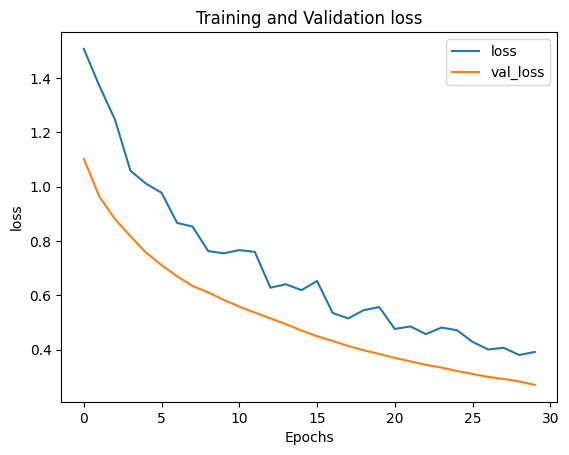

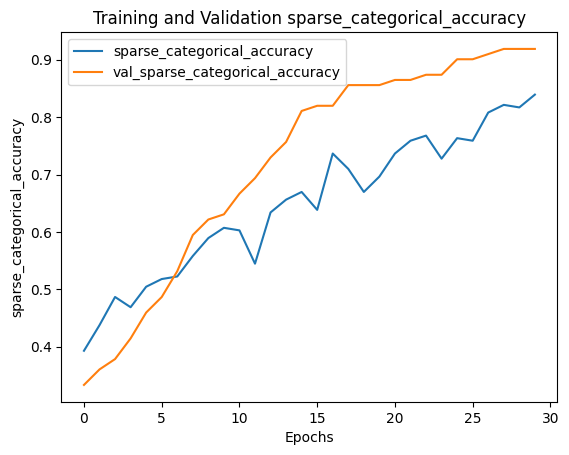

In [ ]:
plot_graphs(history, "loss")
plot_graphs(history, "sparse_categorical_accuracy")

#Function for calculating evaluation metrices (Accuracy, ROC AUC Score, Cohen Kappa Score, Confusion Matrix, Classification Report, Precision vs Recall Plot, ROC Curve) :

In [ ]:
import seaborn
import collections
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelBinarizer
def model_evaluate(model, target, testX, testy):
  y_pred = model.predict(testX)
  # y_pred=y_pred.ravel() > 0.5
  y_pred = (y_pred>0.5)
  y_pred = y_pred.astype(int)
  y_k=[]
  for i in y_pred:
    if(i[0]==1): y_k.append(0)
    else: y_k.append(1)
  y_pred=np.asarray(y_k)
  # print(y_pred)
  # print(collections.Counter(y_pred))
  # y_pred = np.argmax(y_pred, axis=1)
  # print(np.shape(y_pred),testy.shape)
  y_test = testy

  # Confusion matrix
  print('Confusion Matrix')

  cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
  # Calculate accuracy
  cm_np = cm.numpy()
  conf_acc = accuracy_score(y_test, y_pred) * 100
  print("Accuracy for Test Data = ", conf_acc)

  plt.figure(figsize = (6,4))
  seaborn.heatmap(cm, annot=True, fmt='d')
  plt.title("Confusion Matrix for Test Data")
  plt.xlabel('Predicted')
  plt.ylabel('Expected')
  plt.show()

  # Classification Report
  print('\nClassification Report')
  print(classification_report(y_test, y_pred))

  # Cohen Kappa Score
  print('\nCohen Kappa Score')
  print(cohen_kappa_score(y_test, y_pred))

  # Precision vs Recall Curve
  print('\nPrecision vs Recall Curve')
  fig, c_ax = plt.subplots(1,1, figsize = (6, 4))

  y_test = tf.keras.utils.to_categorical(y_test)
  y_pred = tf.keras.utils.to_categorical(y_pred)
  n_classes = 2

  precision = dict()
  recall = dict()

  for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                          y_pred[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))
      
  plt.xlabel("recall")
  plt.ylabel("precision")
  plt.legend(loc="best")
  plt.title("Precision vs. Recall curve")
  plt.show()

  # ROC Curve
  print('\nROC Curve')
  average = 'macro'
  fig, c_ax = plt.subplots(1,1, figsize = (6, 4))
  for (idx, c_label) in enumerate(target):
      fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
      c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
  c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
  print('ROC AUC score:', roc_auc_score(y_test, y_pred, average=average))

  c_ax.legend()
  c_ax.set_xlabel('False Positive Rate')
  c_ax.set_ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.show()

#Results of all the evaluation metrices.

4/4 [==============================] - 0s 3ms/step
Confusion Matrix
Accuracy for Test Data =  92.03539823008849


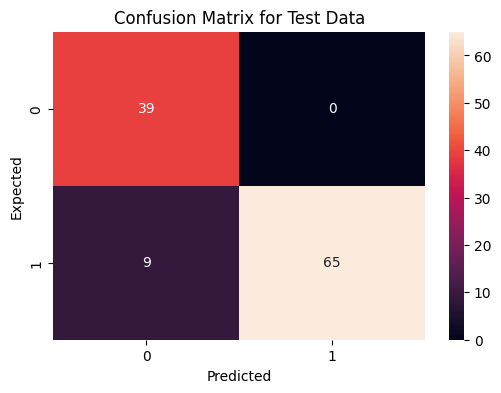


Classification Report
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        39
           1       1.00      0.88      0.94        74

    accuracy                           0.92       113
   macro avg       0.91      0.94      0.92       113
weighted avg       0.94      0.92      0.92       113


Cohen Kappa Score
0.8329226219812715

Precision vs Recall Curve


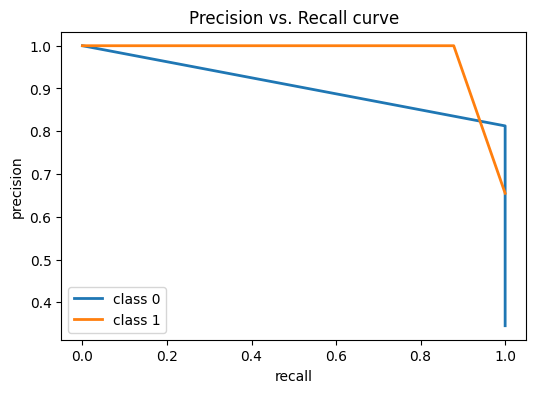


ROC Curve
ROC AUC score: 0.9391891891891893


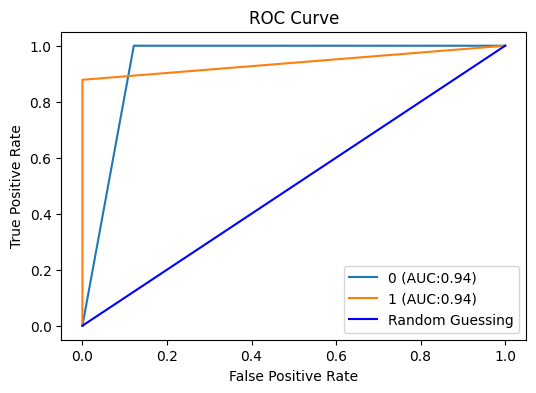

In [ ]:
model_evaluate(model, [0,1], X_test, y_test)

#Model save and model load step:

In [ ]:
# model.save("/content/drive/MyDrive/Parkinsons_Model/Siamese_PPMI_Model2.h5")
print("Siamese Gait Model saved Successfully!")
PPMI_model = tf.keras.models.load_model("/content/drive/MyDrive/Parkinsons_Model/Siamese_PPMI_Model2.h5")

Siamese Gait Model saved Successfully!


In [ ]:
PPMI_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 first_base_dense (Dense)    (None, 128)               204288    
                                                                 
 first_dropout (Dropout)     (None, 128)               0         
                                                                 
 second_base_dense (Dense)   (None, 64)                8256      
                                                                 
 second_dropout (Dropout)    (None, 64)                0         
                                                                 
 third_base_dense (Dense)    (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 214,657
Trainable params: 214,657
Non-tr